In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 12 10:01:07 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with agent failure probability $p$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 80
fail_probability = [0, 0.01, 0.02]
fail_bounds = {}
for p in fail_probability:
    agent_reply_pattern = [[np.random.rand()>p for j in range(max_iter+1)] for i in range(len(agents))]
    prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter, agent_reply_pattern=agent_reply_pattern)
    fail_bounds[p] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=223.72486477254165, L=-875250.7766582207, U=-3894.766062242902
k=1, rel_gap=0.17835016694011133, L=-4589.398239636604, U=-3894.766062242902
k=2, rel_gap=0.08998252603242068, L=-4581.2926291316735, U=-4203.088141062003
k=3, rel_gap=0.05914623745606878, L=-4578.286766590593, U=-4322.620054419531
k=4, rel_gap=0.04780521270741935, L=-4575.197367212055, U=-4366.457917679396
k=5, rel_gap=0.04389010447562625, L=-4573.102672059192, U=-4380.827687179181
k=6, rel_gap=0.04181932924853041, L=-4570.959663238515, U=-4387.478265099546
k=7, rel_gap=0.040510850273421266, L=-4568.459898796857, U=-4390.593233695136
k=8, rel_gap=0.03925750860377266, L=-4564.755561862737, U=-4392.323869755263
k=9, rel_gap=0.037749442577614215, L=-4559.787184517187, U=-4393.9191845686355
k=10, rel_gap=0.03659287065357761, L=-4557.62937702694, U=-4396.74003753598
k=11, rel_gap=0.03515979196244527, L=-4551.328502568699, U=-4396.74003753598
k=12, rel_gap=0.034225631358415345, L=-4547.221241239472, U=-4396.74003753

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=15, rel_gap=0.031739173935043635, L=-4536.288934334505, U=-4396.74003753598


/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:160: UserWarning: Constraint #0 contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn(f"Constraint #{i} contains too many subexpressions. "


k=16, rel_gap=0.03124564494665478, L=-4534.119015671571, U=-4396.74003753598
k=17, rel_gap=0.030005387988429787, L=-4528.665928246511, U=-4396.74003753598
k=18, rel_gap=0.029228375745479318, L=-4526.081971742968, U=-4397.548764106592
k=19, rel_gap=0.02752195561664492, L=-4520.5984065845, U=-4399.5151460014895
k=20, rel_gap=0.026543004128294332, L=-4518.55250336426, U=-4401.7176924811465
k=21, rel_gap=0.02571119756863218, L=-4517.016488629501, U=-4403.789779556598
k=22, rel_gap=0.024469804964165523, L=-4514.328857319554, U=-4406.5025981682875
k=23, rel_gap=0.02390161034276055, L=-4513.41090405656, U=-4408.051377656935
k=24, rel_gap=0.023310588112599052, L=-4511.981806428873, U=-4409.2007439801855
k=25, rel_gap=0.022905678373599678, L=-4511.391215032123, U=-4410.368727452123
k=26, rel_gap=0.02170287879211687, L=-4508.082753181143, U=-4412.322649526752
k=27, rel_gap=0.021224324296131376, L=-4507.209859378574, U=-4413.535549581747
k=28, rel_gap=0.020644559748129235, L=-4506.059460613681, U

k=41, rel_gap=0.013932411656035502, L=-4492.927795185171, U=-4431.19062329506
k=42, rel_gap=0.013581299016749322, L=-4492.06496861134, U=-4431.874357754019
k=43, rel_gap=0.013303612768180864, L=-4491.7614022091775, U=-4432.78929001192
k=44, rel_gap=0.012852275360409901, L=-4490.8064068111025, U=-4433.821709304162
k=45, rel_gap=0.012763108031770793, L=-4490.411054773622, U=-4433.821709304162
k=46, rel_gap=0.012687064739317792, L=-4490.073892372697, U=-4433.821709304162
k=47, rel_gap=0.012374684586589232, L=-4489.418226495724, U=-4434.542165906699
k=48, rel_gap=0.012217339920026472, L=-4488.720474937271, U=-4434.542165906699
k=49, rel_gap=0.012048516823608923, L=-4487.971821797629, U=-4434.542165906699
k=50, rel_gap=0.011845613846745241, L=-4487.664019756825, U=-4435.1272154019825
k=51, rel_gap=0.011431694786219799, L=-4487.151605174633, U=-4436.435627146384
k=52, rel_gap=0.011388218995199855, L=-4486.958727626434, U=-4436.435627146384
k=53, rel_gap=0.011038341573834968, L=-4486.59772022

k=66, rel_gap=0.008333974672840156, L=-4483.447644668302, U=-4446.391530269505
k=67, rel_gap=0.008290780677879627, L=-4483.255587254951, U=-4446.391530269505
k=68, rel_gap=0.008038951476279808, L=-4482.789271413026, U=-4447.039734772105
k=69, rel_gap=0.008024650973073416, L=-4482.72567650704, U=-4447.039734772105
k=70, rel_gap=0.007884305765905373, L=-4482.443464126772, U=-4447.3789684824
k=71, rel_gap=0.007765050132238613, L=-4482.324783589144, U=-4447.787490745958
k=72, rel_gap=0.007737975387382979, L=-4482.20436087766, U=-4447.787490745958
k=73, rel_gap=0.0075873397641359405, L=-4481.534365636921, U=-4447.787490745958
k=74, rel_gap=0.007541522051504019, L=-4481.3305781878225, U=-4447.787490745958
k=75, rel_gap=0.007465831225458217, L=-4480.993921478572, U=-4447.787490745958
k=76, rel_gap=0.007403953285236879, L=-4480.718701550102, U=-4447.787490745958
k=77, rel_gap=0.007195875574760432, L=-4480.528838904062, U=-4448.517857906467
k=78, rel_gap=0.007159291808588434, L=-4480.3660953669

# Centralized solution

In [5]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]

# Plot

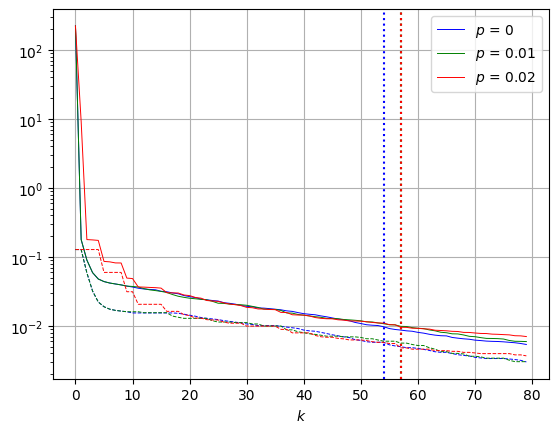

In [6]:
ob.plot_agent_failure(fail_bounds=fail_bounds, fail_probability=fail_probability, h_true=h_cvx)